- environment setup

In [1]:
import re
import unicodedata
import pandas as pd
import nltk

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from wordcloud import WordCloud

In [4]:
import acquire

import prepare

## Wrangle Data

- Acquire

In [5]:
df = acquire.acquire_microsoft()

In [6]:
df.head()

,repo,language,readme_contents
0,microsoft/roosterjs-react,TypeScript,\n# Contributing\n\nThis project welcomes cont...
1,microsoft/vscode-azure-iot-toolkit,HTML,# Azure IoT Hub\n\n[![Join the chat at https:/...
2,microsoft/vscode-azuretools,TypeScript,# VSCode Azure SDK for Node.js\n\n[![Build Sta...
3,microsoft/knack,Python,Knack\n=====\n\n.. image:: https://img.shields...
4,microsoft/browsecloud,TypeScript,**BrowseCloud - Public Demo**\n\n[Try out Brow...


In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(261, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 269
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             261 non-null    object
 1   language         261 non-null    object
 2   readme_contents  261 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [10]:
df.isnull().sum()

repo               0
language           0
readme_contents    0
dtype: int64

- Prepare

In [11]:
from prepare import prepare_microsoft

In [12]:
df.readme_contents = df.readme_contents.apply(prepare_microsoft)

In [13]:
df.head()

,repo,language,readme_contents
0,microsoft/roosterjs-react,TypeScript,contributing project welcome contribution sugg...
1,microsoft/vscode-azure-iot-toolkit,HTML,azure iot hub join chat httpsgitterimmicrosoft...
2,microsoft/vscode-azuretools,TypeScript,vscode azure sdk nodejs build statushttpsdevaz...
3,microsoft/knack,Python,knack image httpsimgshieldsiopypivknacksvg tar...
4,microsoft/browsecloud,TypeScript,browsecloud public demo try browsecloud demons...


In [14]:
df.readme_contents[0]

'contributing project welcome contribution suggestion contribution require agree contributor license agreement cla declaring right actually grant u right use contribution detail visit httpsclamicrosoftcom submit pull request clabot automatically determine whether need provide cla decorate pr appropriately eg label comment simply follow instruction provided bot need across repos using cla project ha adopted microsoft open source code conducthttpsopensourcemicrosoftcomcodeofconduct information see code conduct faqhttpsopensourcemicrosoftcomcodeofconductfaq contact opencodemicrosoftcommailtoopencodemicrosoftcom additional question comment'

# Exlpore

## Q1: How many languages are there?

In [15]:
df.language.value_counts()

TypeScript          126
C#                   32
JavaScript           18
Python               16
C++                  16
Jupyter Notebook      8
HTML                  7
PowerShell            7
C                     5
CSS                   4
Shell                 3
Java                  3
JSON                  2
Go                    2
Ruby                  2
Q#                    1
CMake                 1
Objective-C           1
F#                    1
Swift                 1
Rust                  1
Dafny                 1
Kotlin                1
Liquid                1
SCSS                  1
Name: language, dtype: int64

- most, about half, repositories are written in Typescript
    - Typescript appears to be Microsoft's personal programming language, this would make sense 


- many langauges only appear once or twice, should the be removed? should I pull more repositories?
    - Perhaps condensed into 'other'?



- overall not a even distribution

## Q2: What are the most common words among Typescript repos vs non Typescript repos

In [16]:
# make boolean variable for is or is not Typescript
df['is_TypeScript'] = df.language == 'TypeScript'

In [17]:
df.head()

,repo,language,readme_contents,is_TypeScript
0,microsoft/roosterjs-react,TypeScript,contributing project welcome contribution sugg...,True
1,microsoft/vscode-azure-iot-toolkit,HTML,azure iot hub join chat httpsgitterimmicrosoft...,False
2,microsoft/vscode-azuretools,TypeScript,vscode azure sdk nodejs build statushttpsdevaz...,True
3,microsoft/knack,Python,knack image httpsimgshieldsiopypivknacksvg tar...,False
4,microsoft/browsecloud,TypeScript,browsecloud public demo try browsecloud demons...,True


In [18]:
df.is_TypeScript.value_counts()

False    135
True     126
Name: is_TypeScript, dtype: int64

In [19]:
typescript = df[df['is_TypeScript'] == True]

In [20]:
typescript.head()

,repo,language,readme_contents,is_TypeScript
0,microsoft/roosterjs-react,TypeScript,contributing project welcome contribution sugg...,True
2,microsoft/vscode-azuretools,TypeScript,vscode azure sdk nodejs build statushttpsdevaz...,True
4,microsoft/browsecloud,TypeScript,browsecloud public demo try browsecloud demons...,True
5,microsoft/FluidFramework,TypeScript,fluid fluid framework typescript library build...,True
6,microsoft/PowerBI-visuals-CardBrowser,TypeScript,nodejs cihttpsgithubcommicrosoftpowerbivisuals...,True


In [21]:
typescript.is_TypeScript.value_counts()

True    126
Name: is_TypeScript, dtype: int64

In [22]:
non_typescript = df[df['is_TypeScript'] == False]

In [23]:
non_typescript.head()

,repo,language,readme_contents,is_TypeScript
1,microsoft/vscode-azure-iot-toolkit,HTML,azure iot hub join chat httpsgitterimmicrosoft...,False
3,microsoft/knack,Python,knack image httpsimgshieldsiopypivknacksvg tar...,False
7,microsoft/Azure-Sphere-DevX,C,azure sphere devx library devx library acceler...,False
8,microsoft/ai.ed,Python,aied ai programming education project goal pro...,False
10,microsoft/BuildXL,C#,microsoft build accelerator img altbuildxl ico...,False


In [24]:
non_typescript.is_TypeScript.value_counts()

False    135
Name: is_TypeScript, dtype: int64

In [25]:
typescript_words = (' '.join(df[df.is_TypeScript == True].readme_contents)).split()
other_words = (' '.join(df[df.is_TypeScript == False].readme_contents)).split()
all_words = (' '.join(df.readme_contents)).split()

In [26]:
typescript_freq = pd.Series(typescript_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [27]:
typescript_freq.head()

'          675
code       491
run        436
project    402
use        351
dtype: int64

In [28]:
other_freq.head()

'          922
code       614
build      519
use        448
project    437
dtype: int64

In [29]:
all_freq.head()

'          1597
code       1105
run         856
project     839
build       823
dtype: int64

- the apostrophe character is the most recuring feature all around

- the words 'code', 'use', and 'project' show up in the top 5 of both typescript and non typescript repos

## Q3: Are there any words that uniquely identify Typescript vs non Typescript

In [30]:
# put word counts into seperate df

word_counts = (pd.concat([all_freq, typescript_freq, other_freq], axis=1, sort=True)
                .set_axis(['all', 'Typescript', 'other'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()


,all,Typescript,other
&#9;,414,300,114
',1597,675,922
0,31,9,22
00,4,2,2
00000000000000000000000000000000,1,0,1


In [31]:
word_counts_df = word_counts.sort_values(by='all', ascending=False)

In [32]:
word_counts_df.head()

,all,Typescript,other
',1597,675,922
code,1105,491,614
run,856,436,420
project,839,402,437
build,823,304,519


In [33]:
pd.concat([word_counts[word_counts.Typescript == 0].sort_values(by='other').tail(6),
           word_counts[word_counts.other == 0].sort_values(by='Typescript').tail(6)])

,all,Typescript,other
lia,60,0,60
vcpkg,64,0,64
codepush,78,0,78
fhir,90,0,90
appcenter,101,0,101
quantum,206,0,206
expo,29,29,0
serial,34,34,0
reactnative,34,34,0
packager,35,35,0


- there are quite a few words such as 'quantum' and 'appcenter' which appear in non typescript but not in typescript

- there are words that appear exclusively in typescript that don't appear in non typescript, but they are not as frequent

## Visualizations 

Text(0.5, 1.0, 'Proportion of Typescript vs other for the 20 most common words')

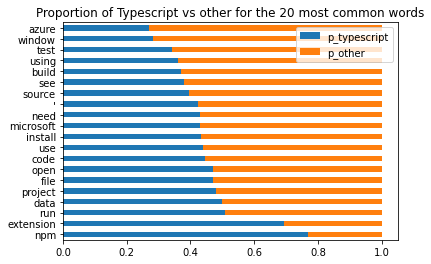

In [34]:
# figure out the percentage of typescript vs other
(word_counts
 .assign(p_typescript=word_counts.Typescript / word_counts['all'],
         p_other=word_counts.other / word_counts['all'])
 .sort_values(by='all')
 [['p_typescript', 'p_other']]
 .tail(20)
 .sort_values('p_other')
 .plot.barh(stacked=True))

plt.title('Proportion of Typescript vs other for the 20 most common words')

In [35]:
(word_counts
 [(word_counts.Typescript > 10) & (word_counts.other > 10)]
 .assign(ratio=lambda df: df.Typescript / (df.other + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,Typescript,other,ratio
c,182,23,159,0.144645
learning,90,13,77,0.168809
deployment,97,16,81,0.197506
update,338,56,282,0.198575
p,90,15,75,0.199973
debugging,123,102,21,4.854831
typescript,153,127,26,4.882737
launch,98,82,16,5.121799
edge,87,74,13,5.687932
simulator,80,69,11,6.267030


## Word Clouds

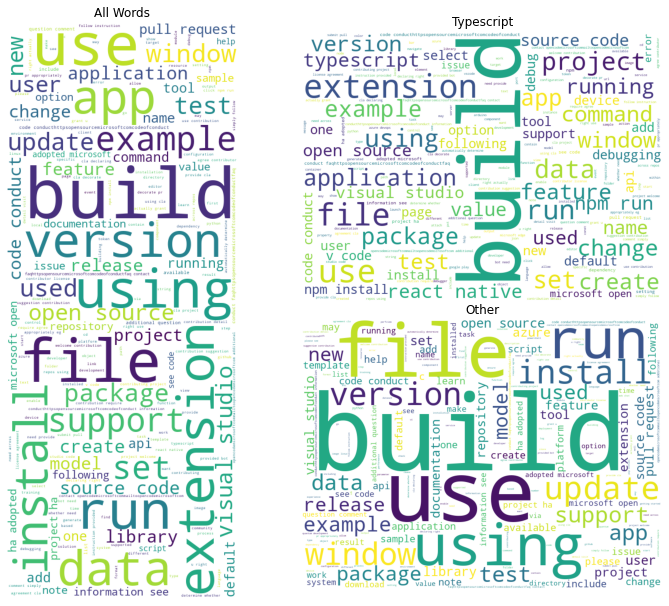

In [36]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
typescript_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(typescript_words))
other_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(other_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(typescript_cloud)
axs[2].imshow(other_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Typescript')
axs[2].set_title('Other')

for ax in axs: ax.axis('off')

#### Bigrams

In [37]:
# make typescript bigrams
top_20_typescript_bigrams = (pd.Series(nltk.ngrams(typescript_words, 2))
                      .value_counts()
                      .head(20))

top_20_typescript_bigrams

(&#9;, &#9;)                                                 216
(npm, run)                                                    93
(react, native)                                               92
(open, source)                                                91
(visual, studio)                                              91
(source, code)                                                91
(npm, install)                                                90
(code, conduct)                                               86
(v, code)                                                     81
(microsoft, open)                                             78
(code, conducthttpsopensourcemicrosoftcomcodeofconduct)       72
(project, ha)                                                 71
(ha, adopted)                                                 70
(pull, request)                                               70
(adopted, microsoft)                                          70
(information, see)       

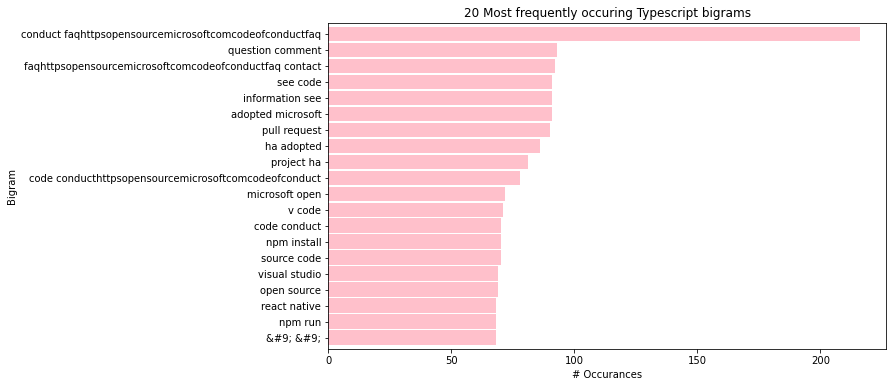

In [38]:
top_20_typescript_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Typescript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_typescript_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

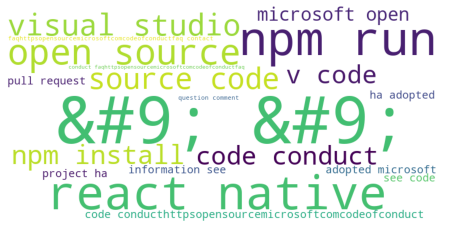

In [39]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_typescript_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [40]:
# make non typescript bigrams

top_20_other_bigrams = (pd.Series(nltk.ngrams(other_words, 2))
                      .value_counts()
                      .head(20))

top_20_other_bigrams

(open, source)                                                    143
(visual, studio)                                                  141
(source, code)                                                    129
(pull, request)                                                   119
(code, conduct)                                                   114
(microsoft, open)                                                  90
(project, ha)                                                      87
(information, see)                                                 86
(see, code)                                                        85
(ha, adopted)                                                      84
(adopted, microsoft)                                               84
(question, comment)                                                83
(additional, question)                                             83
(code, conducthttpsopensourcemicrosoftcomcodeofconduct)            79
(opencodemicrosoftco

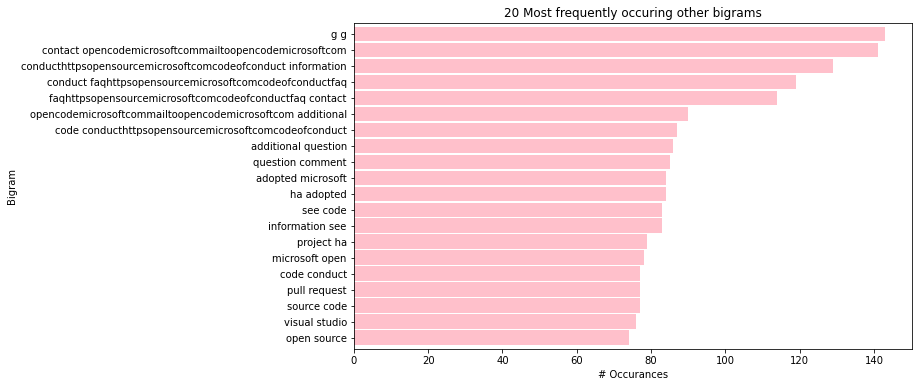

In [41]:
top_20_other_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring other bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

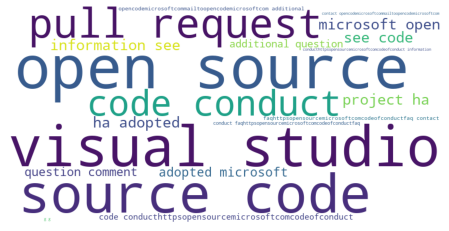

In [42]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_other_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
# make all bigrams

top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_all_bigrams

(&#9;, &#9;)                                                      241
(open, source)                                                    234
(visual, studio)                                                  232
(source, code)                                                    220
(code, conduct)                                                   200
(pull, request)                                                   189
(microsoft, open)                                                 168
(project, ha)                                                     158
(information, see)                                                155
(adopted, microsoft)                                              154
(ha, adopted)                                                     154
(see, code)                                                       154
(question, comment)                                               151
(additional, question)                                            151
(code, conducthttpso

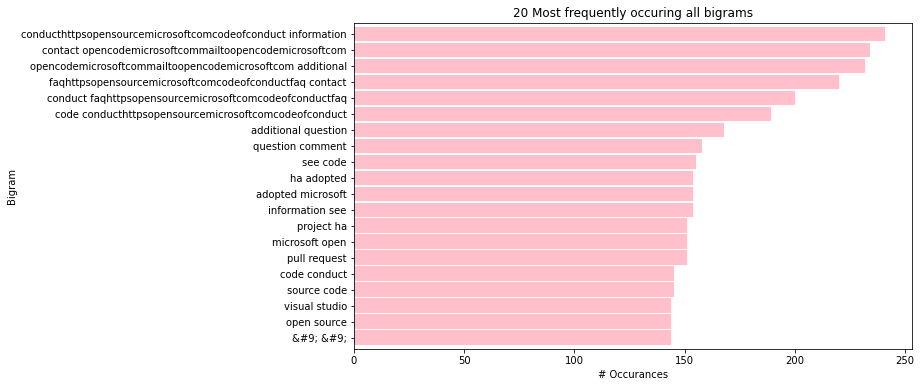

In [44]:
top_20_all_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring all bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

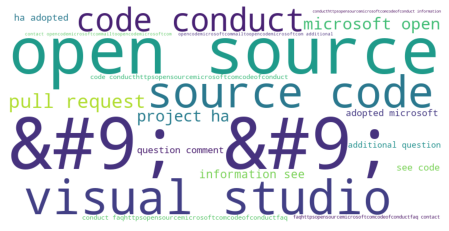

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

#### Trigrams

In [46]:
# make typescript trigrams
top_20_typescript_trigrams = (pd.Series(nltk.ngrams(typescript_words, 3))
                      .value_counts()
                      .head(20))

top_20_typescript_trigrams

(&#9;, &#9;, &#9;)                                                                                           148
(open, source, code)                                                                                          79
(microsoft, open, source)                                                                                     78
(source, code, conducthttpsopensourcemicrosoftcomcodeofconduct)                                               72
(ha, adopted, microsoft)                                                                                      70
(adopted, microsoft, open)                                                                                    70
(project, ha, adopted)                                                                                        69
(see, code, conduct)                                                                                          68
(code, conduct, faqhttpsopensourcemicrosoftcomcodeofconductfaq)                                 

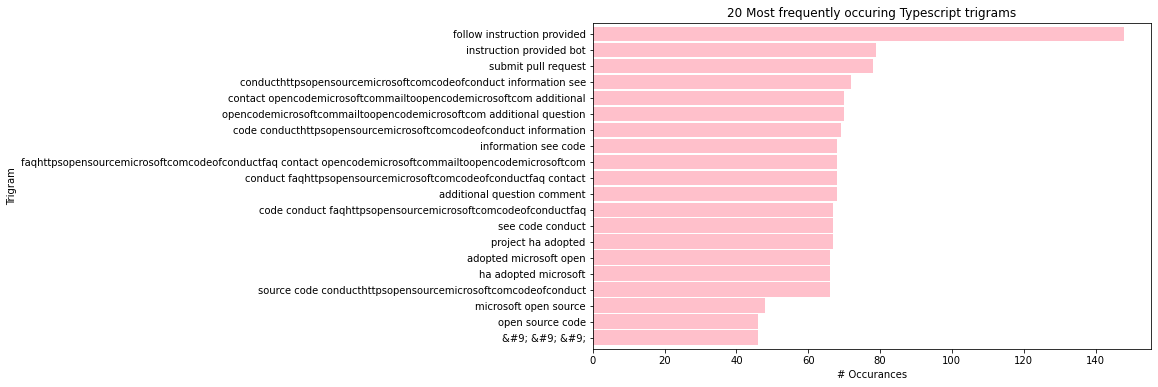

In [47]:
top_20_typescript_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Typescript trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_typescript_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

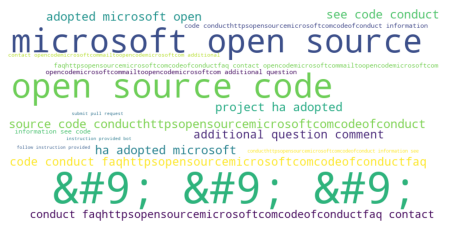

In [48]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_typescript_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [49]:
# make other trigrams
top_20_other_trigrams = (pd.Series(nltk.ngrams(other_words, 3))
                      .value_counts()
                      .head(20))

top_20_other_trigrams

(microsoft, open, source)                                                                                    90
(open, source, code)                                                                                         88
(project, ha, adopted)                                                                                       84
(see, code, conduct)                                                                                         84
(adopted, microsoft, open)                                                                                   84
(ha, adopted, microsoft)                                                                                     84
(information, see, code)                                                                                     83
(additional, question, comment)                                                                              83
(source, code, conducthttpsopensourcemicrosoftcomcodeofconduct)                                         

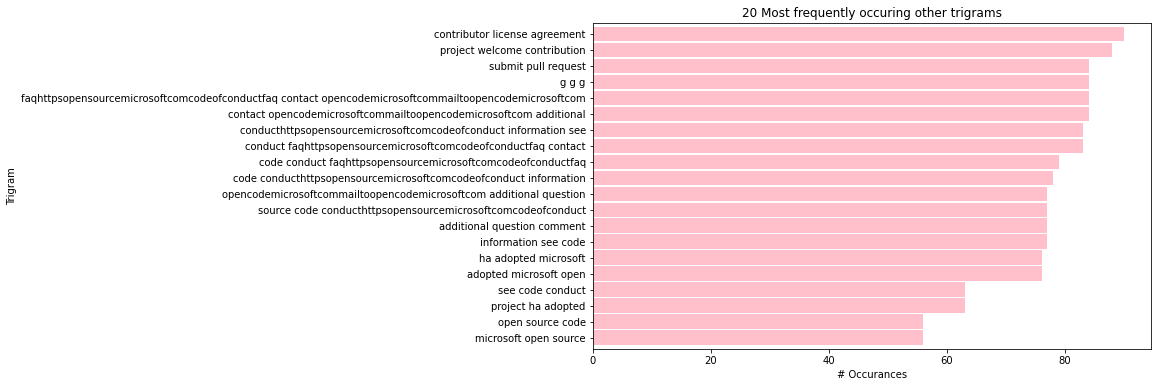

In [50]:
top_20_other_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring other trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_other_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' +t[2])
_ = plt.yticks(ticks, labels)

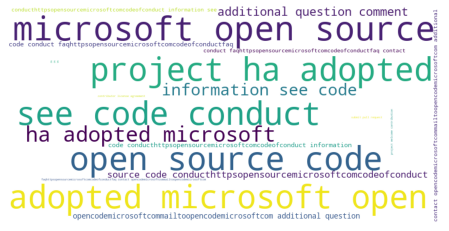

In [51]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_other_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [52]:
# make all trigrams
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))

top_20_all_trigrams

(microsoft, open, source)                                                                                    168
(open, source, code)                                                                                         167
(adopted, microsoft, open)                                                                                   154
(ha, adopted, microsoft)                                                                                     154
(project, ha, adopted)                                                                                       153
(&#9;, &#9;, &#9;)                                                                                           152
(see, code, conduct)                                                                                         152
(additional, question, comment)                                                                              151
(source, code, conducthttpsopensourcemicrosoftcomcodeofconduct)                                 

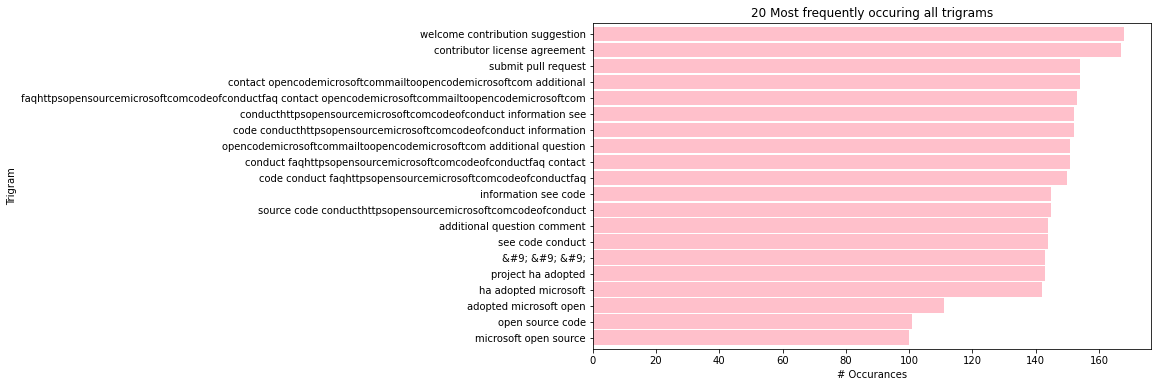

In [53]:
top_20_all_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring all trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_all_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

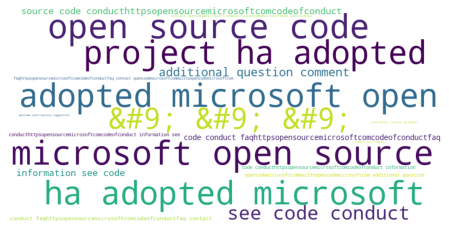

In [54]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()